In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [40]:
df=pd.read_csv("csvs\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.corr()["target"].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [6]:
df.corr().style.background_gradient(cmap="coolwarm")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


I chose thalach and oldpeak as they have nearly the biggest correlation

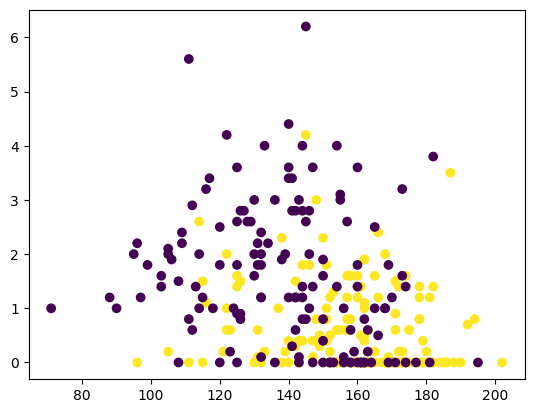

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df["thalach"], df["oldpeak"], c=df["target"])

Potting the data by the "thalach" and "oldpeak" values

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = np.array(df[["oldpeak", "thalach"]])
y = np.array(df["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

pred=model.predict(X_test)
acc=accuracy_score(y_test, pred)

print(f"Accuracy: {acc}")

Accuracy: 0.7631578947368421


Creating a logistical regression model to predict the decision boundary

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
#creating desicion tree classifiere thats not tuned

DecisionTreeClassifier()

## Confusion Matrix Display for LR and not tuned DTree 

Logistic Regression: 


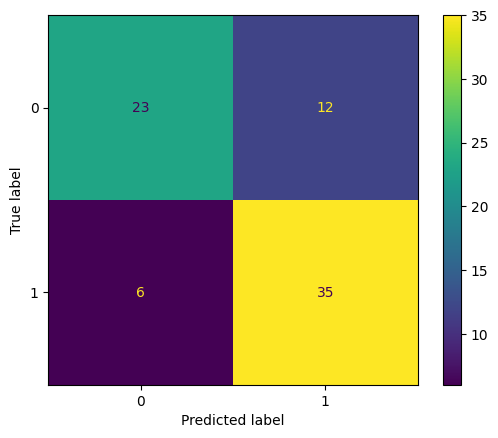

Decision Tree: 


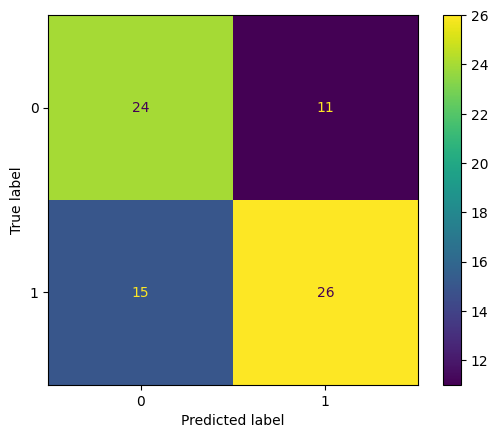

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Logistic Regression: ")
disp1 = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

print("Decision Tree: ")
disp1 = ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)
plt.show()

## Visualisation of decision boundaries

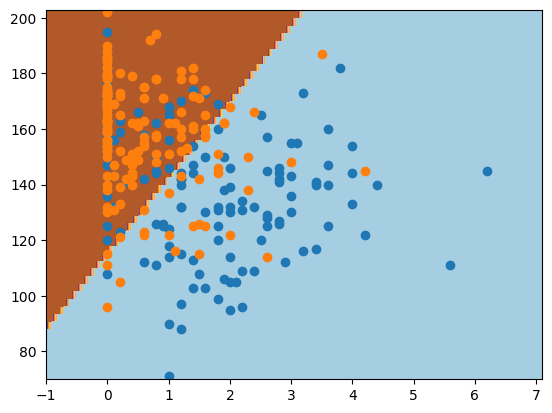

In [31]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

We can see that the calssifying works, as the 2 chosen classes don't overlap too much

## Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#sellecting values for all hyperparemeters
params_distribution = {
    "max_depth": [3, 5, 10, 20, 25],  
    "min_samples_split": [5, 10, 15, 20, 25],
    "min_samples_leaf": [5, 10, 15],
    "min_weight_fraction_leaf": [0.05, 0.1, 0.2],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [2, 5, 10, 20, 40],
    "min_impurity_decrease": [0, 0.01, 0.05] #A node will be split if this split induces a decrease of the impurity greater than or equal to this value
}

dtree = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=dtree, param_distributions=params_distribution, cv=5)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters are: {best_params}")

Best parameters are: {'min_weight_fraction_leaf': 0.05, 'min_samples_split': 15, 'min_samples_leaf': 10, 'min_impurity_decrease': 0, 'max_leaf_nodes': 40, 'max_features': 'log2', 'max_depth': 3}


## Notes
 - **Grid Search** - algorithm searches thru every posible combination of parametres
 - **Random Search** - does not earch thru every possibility, but chooses and random, being faster, and better for large number of hyperparameters
 - **Hyperparameters**
    - *max_depth* - depth of the decision tree 
    - *min_samples_split* - minimum number of samples needed to split a leaf 
    - *min_samples_leaf* - the minimum samples a leaf node must have after a split
    - *min_weight_fraction_leaf* - the minimum fraction of the total weight required in a leaf node.
    - *max_features* - number of features to conssider (either a number or a proportion of features (sqrt or log2))
    - *max_leaf_nodes* - limits number of leaf nodes
    - *min_impurity_decrease* - A node will only be split if the decrease in impurity resulting from the split is at least this value.

## Ploting Accuracies for Different Hyperparameters

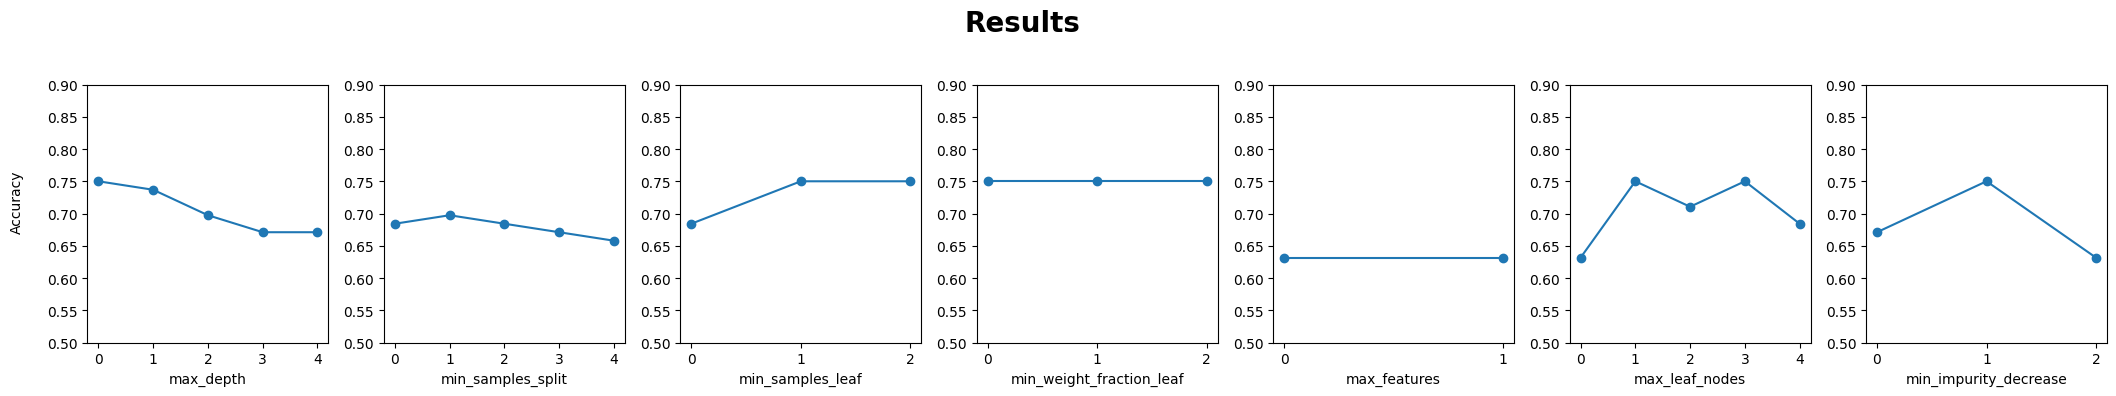

In [25]:
fig, axes = plt.subplots(1, 7, figsize = (22, 4)) #creating subplots
plt.suptitle("Results", fontweight = "bold", fontsize = 20)

"""
Looping thru param keys, selecting the arguments 
for the classifier, fitting, getting accuracies,
than plotting
"""

for key, ax in zip(params_distribution.keys(), axes):   
    accuracies = []
    values = list(params_distribution[key])
    for value in values:
        args = {key: value, "random_state": 42}
        decision_tree = DecisionTreeClassifier(**args)

        decision_tree.fit(X_train, y_train)
        pred = decision_tree.predict(X_test)
        acc = accuracy_score(y_test, pred)
        accuracies.append(acc)

    ax.plot(accuracies, marker="o")

     # Set y-axis limits
    ax.set_ylim(0.5, 0.9)

    # Add x-labels for each subplot
    ax.set_xticks(range(len(values)))
    ax.set_xlabel(key)  # x-label for each subplot
    
fig.text(0.04, 0.5, "Accuracy", va="center", rotation="vertical")

plt.tight_layout(rect=[0.05, 0, 1, 0.95])  # Adjust layout to make space for the y-axis label


#FOR TRAINING DATA#

We can see that the accuracy differs in relation to the hyperparameters we use, thus showing how important hyperparameter tuning is. Some parameters are more imoprtant than others, like max_depth, max_leaf_nodes and min_impurity_decrease, who change the accuracy of the model a lot, in constrast to min_weight_fraction_leaf, who doesn't change the accurasy at all in this case

## Exporting Tree with Best Hyperparameters

Accuracy: 0.7763157894736842


[Text(0.5, 0.875, 'x[1] <= 146.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]'),
 Text(0.25, 0.625, 'x[0] <= 0.7\ngini = 0.437\nsamples = 93\nvalue = [63.0, 30.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 0.15\ngini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Text(0.0625, 0.125, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.1875, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.375, 0.375, 'x[0] <= 2.35\ngini = 0.309\nsamples = 68\nvalue = [55, 13]'),
 Text(0.3125, 0.125, 'gini = 0.4\nsamples = 47\nvalue = [34, 13]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.75, 0.625, 'x[1] <= 169.5\ngini = 0.419\nsamples = 134\nvalue = [40, 94]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 151.5\ngini = 0.465\nsamples = 87\nvalue = [32, 55]'),
 Text(0.5625, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.6875, 0.125, 'gini = 0.477\nsamples = 74\nvalue = [29, 45]'),
 Text(0.875, 0.375, 'x[1]

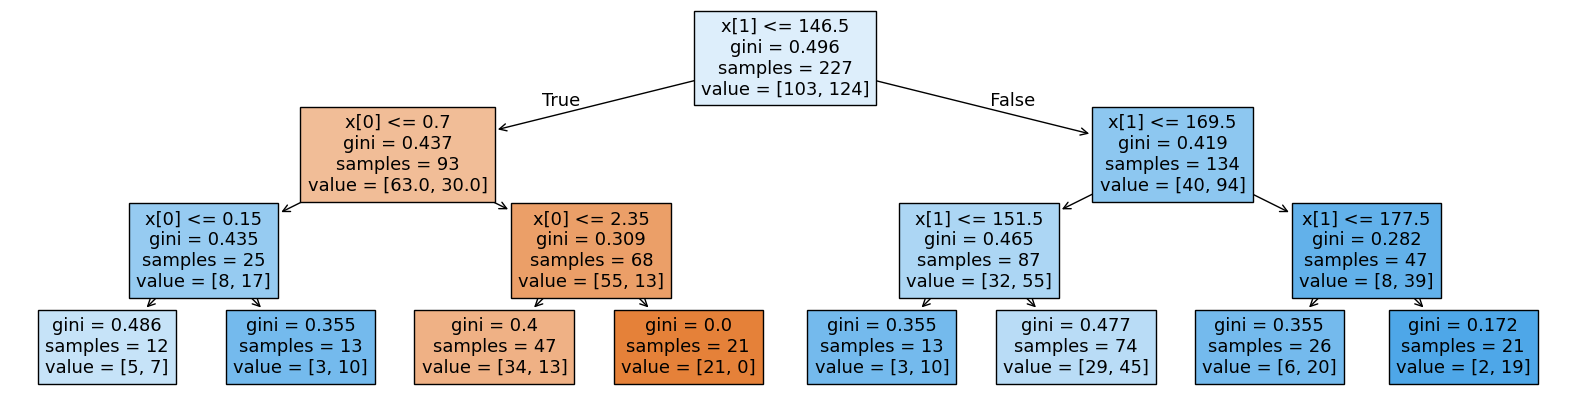

In [27]:
from sklearn import tree

fig = plt.figure(figsize=(20, 5))

best_dtree = DecisionTreeClassifier(**best_params)

best_dtree.fit(X_train, y_train)
best_pred = best_dtree.predict(X_test)

best_acc = accuracy_score(y_test, best_pred)
print(f"Accuracy: {best_acc}")

tree.plot_tree(best_dtree, filled=True)

### Exaplaining the Visualization of the Tree

We can see in each node of the tree the first line of text refers to the value of either the thalach column (x[1]) or the oldpeak column (x[0]), and choosing what node to go next based on the value given.

*gini* refers to the impurity of the node. A gini of 0 would mean that all samples belong to the class. In other words, the lower the gini, the higher the purity

*samples* refers to the number of samples for a node

*values* refers to the distribution of the samples. For example value = [103, 124] means that 103 are in a class, and 124 in the other

## Confusion Matrix Display for Best Decision Tree

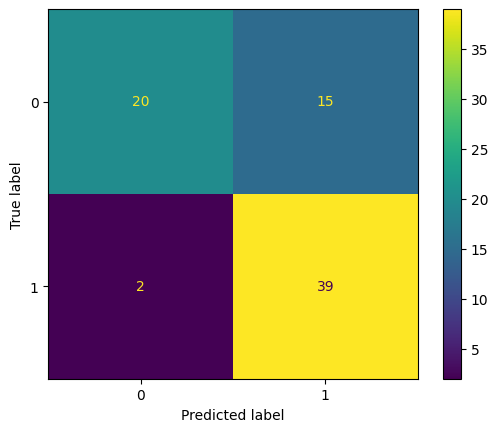

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtree, X_test, y_test)

## Conclusion
We can see that altho after the hyperparameter tuning the accuracy of the model got higher, looking at the confusion matrixes, and the accuracies of the model, the final best decision tree is just a little bit betetr than the logistic regression algorithm in this case.